In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linkedin/linkedin_data.csv
/kaggle/input/profiles-us/us.json
/kaggle/input/profiles-us/Pydantic data.json


In [13]:
import pandas as pd
import json

# Path to the JSON file
file_path = '/kaggle/input/profiles-us/us.json'

# Initialize an empty list to store the experiences data
experiences_data = []

# Open the file and read line by line
with open(file_path, 'r') as file:
    for line in file:
        try:
            # Parse each line as a separate JSON object
            json_obj = json.loads(line)
            # Extract experiences list
            if 'experiences' in json_obj:
                for experience in json_obj['experiences']:
                    starts_at = experience.get('starts_at')
                    ends_at = experience.get('ends_at')
                    # Parse nested date fields
                    start_date = f"{starts_at.get('year', '')}-{starts_at.get('month', '')}-{starts_at.get('day', '')}" if starts_at else None
                    end_date = f"{ends_at.get('year', '')}-{ends_at.get('month', '')}-{ends_at.get('day', '')}" if ends_at else None
                    experiences_data.append({'starts_at': start_date, 'ends_at': end_date})
        except json.JSONDecodeError:
            print("Error decoding JSON from line:", line)
            continue

# Create DataFrame from experiences data
experiences_df = pd.DataFrame(experiences_data)

# Convert starts_at and ends_at to datetime
experiences_df['starts_at'] = pd.to_datetime(experiences_df['starts_at'], errors='coerce')
experiences_df['ends_at'] = pd.to_datetime(experiences_df['ends_at'], errors='coerce')

# Drop rows where both starts_at and ends_at are None
experiences_df.dropna(subset=['starts_at', 'ends_at'], how='all', inplace=True)

# Check if we have any valid data
if not experiences_df.empty:
    print("Valid start and end date pairs found.")
    print(experiences_df.head(10))
else:
    print("No valid start and end date pairs found.")


Valid start and end date pairs found.
   starts_at    ends_at
0 2018-08-01        NaT
1 2017-01-01 2018-08-31
2 2014-09-01 2017-01-31
3 2013-01-01 2014-09-30
4 1998-01-01 2012-12-31
5 2019-04-01        NaT
6 2017-01-01 2019-12-31
7 2012-01-01 2017-12-31
8 2009-01-01 2012-12-31
9 2021-05-01 2021-09-30


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from math import sin, cos, pi
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Assuming experiences_df is your DataFrame with 'starts_at' and 'ends_at' columns

# Filter out rows where either start or end date is missing
valid_experiences = experiences_df.dropna(subset=['starts_at', 'ends_at'])

# Feature Extraction
features = []
for _, row in valid_experiences.iterrows():
    start_date = row['starts_at']
    end_date = row['end_date']
    duration = (end_date - start_date).days

    # Trigonometric conversion of date components
    start_month_sin = sin(2 * pi * start_date.month / 12)
    start_month_cos = cos(2 * pi * ,
        # Add more features as needed
    })

# Convert the features list to a DataFrame
features_df = pd.DataFrame(features)

# Plotting
plt.figure(figsize=(12, 8))
for i, row in valid_experiences.iterrows():
    plt.plot([row['starts_at'], row['ends_at']], [i+1, i+1], marker='o')

# Improving the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Date')
plt.ylabel('Experience Number')
plt.title('Duration of Experiences')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Now you have a DataFrame 'features_df' with extracted features for further analysis

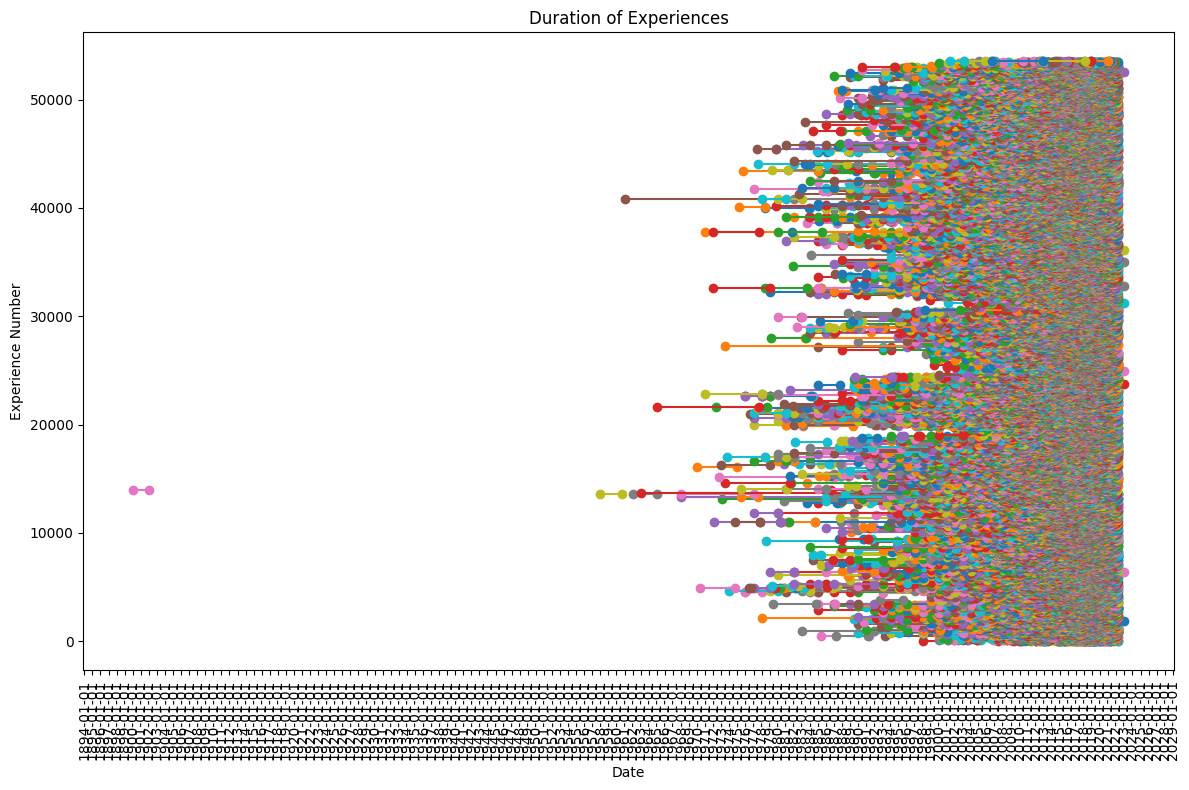

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Filter out rows where either start or end date is missing
valid_experiences = experiences_df.dropna(subset=['starts_at', 'ends_at'])

# Plotting
plt.figure(figsize=(12, 8))

for _, row in valid_experiences.iterrows():
    plt.plot([row['starts_at'], row['ends_at']], [_+1, _+1], marker='o')

# Improving the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Date')
plt.ylabel('Experience Number')
plt.title('Duration of Experiences')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Filter out rows where either start or end date is missing
valid_experiences = experiences_df.dropna(subset=['starts_at', 'ends_at'])

# Creating a new column for the duration of each experience
valid_experiences['Duration'] = valid_experiences['ends_at'] - valid_experiences['starts_at']

# Generate an interactive plot
fig = px.timeline(valid_experiences, x_start="starts_at", x_end="ends_at", y="Duration", labels={'Duration': 'Experience Duration'})

# Improve the layout
fig.update_layout(xaxis_title='Date', yaxis_title='Experience Number', title='Duration of Experiences')

# Show the plot
fig.show()


In [16]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Path to the JSON file
file_path = '/kaggle/input/profiles-us/us.json'

# Initialize an empty list to store the experiences data
experiences_data = []

# Open the file and read line by line
with open(file_path, 'r') as file:
    for line in file:
        try:
            # Parse each line as a separate JSON object
            json_obj = json.loads(line)
            # Extract starts_at and ends_at
            starts_at = json_obj.get('starts_at')
            ends_at = json_obj.get('ends_at')
            # Append the data even if one of them is missing
            experiences_data.append({'starts_at': starts_at, 'ends_at': ends_at})
        except json.JSONDecodeError:
            print("Error decoding JSON from line:", line)
            continue

# Check if we have any data
if experiences_data:
    # Create DataFrame from experiences data
    experiences_df = pd.DataFrame(experiences_data)

    # Drop rows where both starts_at and ends_at are None
    experiences_df.dropna(subset=['starts_at', 'ends_at'], how='all', inplace=True)

    if not experiences_df.empty:
        # Convert starts_at and ends_at to datetime
        experiences_df['starts_at'] = pd.to_datetime(experiences_df['starts_at'], errors='coerce')
        experiences_df['ends_at'] = pd.to_datetime(experiences_df['ends_at'], errors='coerce')

        # Create a plot
        plt.figure(figsize=(12, 6))
        plt.scatter(experiences_df['starts_at'], experiences_df['ends_at'], alpha=0.5)
        plt.title('Start and End Dates of Experiences')
        plt.xlabel('Start Date')
        plt.ylabel('End Date')
        plt.show()
    else:
        print("No valid start and end date pairs found.")
else:
    print("No experiences data found in the file.")


No valid start and end date pairs found.
